Project: Capstone Project - Inferential Statistics 2 - 6 Hours

At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt

In [2]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)
print(asos_df.head())

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)
print(snotel_df.head())

                     Temperature_degC  Dewpoint_degC  Pressure_hp  \
Date_Time                                                           
2006-01-01 01:00:00              -1.0           -7.0          NaN   
2006-01-01 02:00:00              -3.0           -8.0          NaN   
2006-01-01 03:00:00              -4.0           -8.0          NaN   
2006-01-01 04:00:00              -4.0           -9.0          NaN   
2006-01-01 05:00:00              -5.0           -8.0          NaN   

                     WindDirection_deg  WindSpeed_m/s  CloudCover  \
Date_Time                                                           
2006-01-01 01:00:00              220.0            7.7         NaN   
2006-01-01 02:00:00              230.0            5.1         NaN   
2006-01-01 03:00:00              230.0            3.6         NaN   
2006-01-01 04:00:00              240.0            6.2         NaN   
2006-01-01 05:00:00              210.0            6.2         NaN   

                     1hr_Precipi

## Determining Outliers Statistically (Snow Depth)

-196.0


Text(0,0.5,'Snow Depth (inches)')

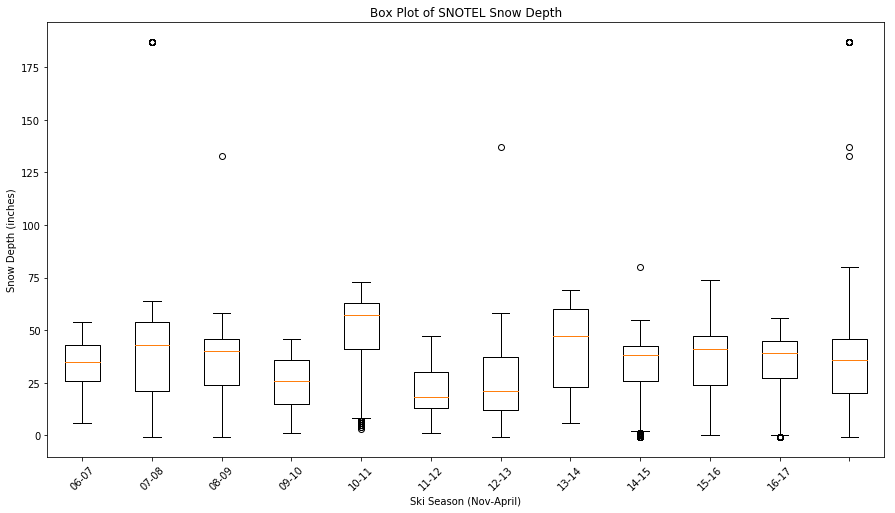

In [3]:

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_df['SNWD.I-1 (in) '][~np.isnan(snotel_df['SNWD.I-1 (in) '])]

merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
print(filtered_data.min())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

       TOBS.I-1 (degC)   SNWD.I-1 (in) 
count      95090.000000    82932.000000
mean           1.358249       21.443942
std            9.107234       21.196144
min          -33.100000       -3.000000
25%           -5.000000        0.000000
50%            1.300000       18.000000
75%            7.700000       40.000000
max           25.100000      187.000000


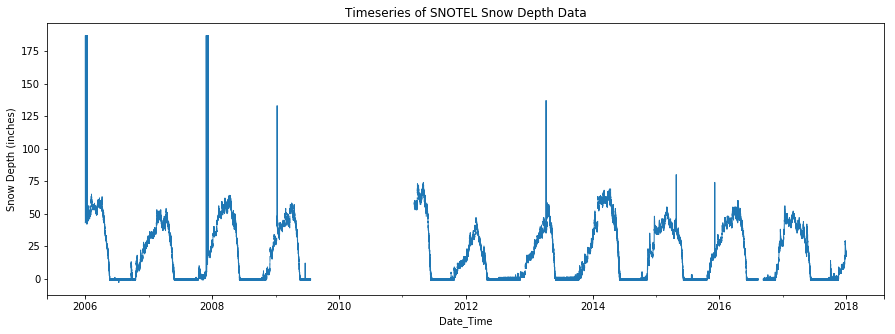

In [4]:
print(snotel_df['2006':'2017'].describe())

#years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

#for j in years:
plt.figure(figsize=(15,5))
    
ax1 = snotel_df['SNWD.I-1 (in) ']['2006':'2017'].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("Snow Depth (inches)")
ax1.set_title("Timeseries of SNOTEL Snow Depth Data")
  
#ax2 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, secondary_y = True, marker='.', markersize = 0.25)
#ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
#Create legend
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

plt.show()

In [5]:
plt.figure(figsize=(15,5))

xx=(snotel_df['SNWD.I-1 (in) ']<-100) | (snotel_df['SNWD.I-1 (in) ']>100) | (snotel_df['SNWD.I-1 (in) ']['2015']>70)
snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
snotel_filled_df = snotel_df.interpolate(limit=3)


<Figure size 1080x360 with 0 Axes>

74.0


Text(0,0.5,'Snow Depth (inches)')

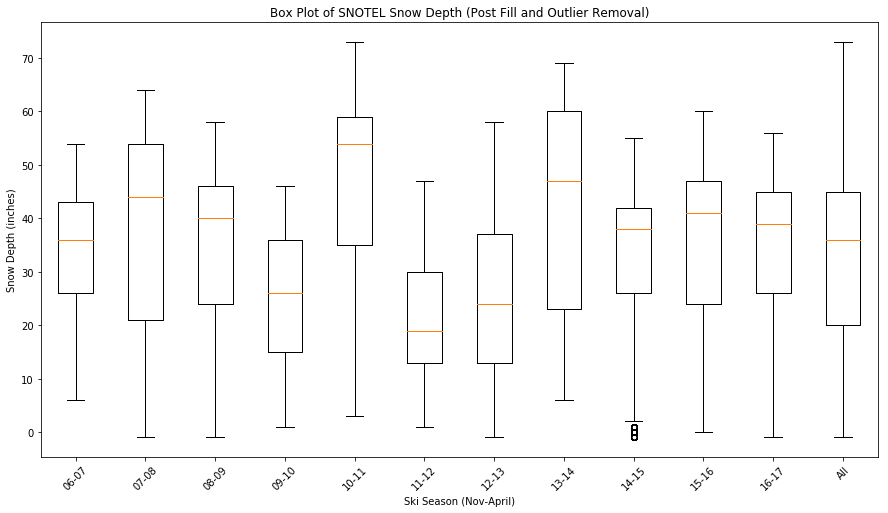

In [6]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_filled_df['SNWD.I-1 (in) '][~np.isnan(snotel_filled_df['SNWD.I-1 (in) '])]


merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth (Post Fill and Outlier Removal)')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

Text(0.5,1,'Timeseries of SNOTEL Snow Depth (Post Filled and Outlier Removal)')

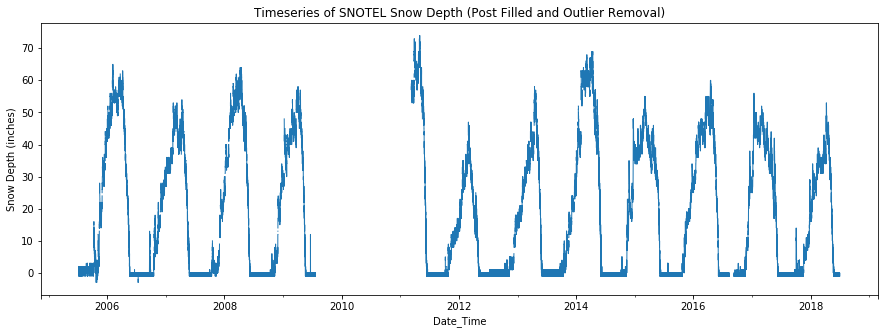

In [7]:
plt.figure(figsize=(15,5))

ax1 = snotel_df['SNWD.I-1 (in) '].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("Snow Depth (inches)")
ax1.set_title("Timeseries of SNOTEL Snow Depth (Post Filled and Outlier Removal)")


----


## Determining Outliers Statistically (Temperature)

25.8


Text(0,0.5,'Temperature (deg C)')

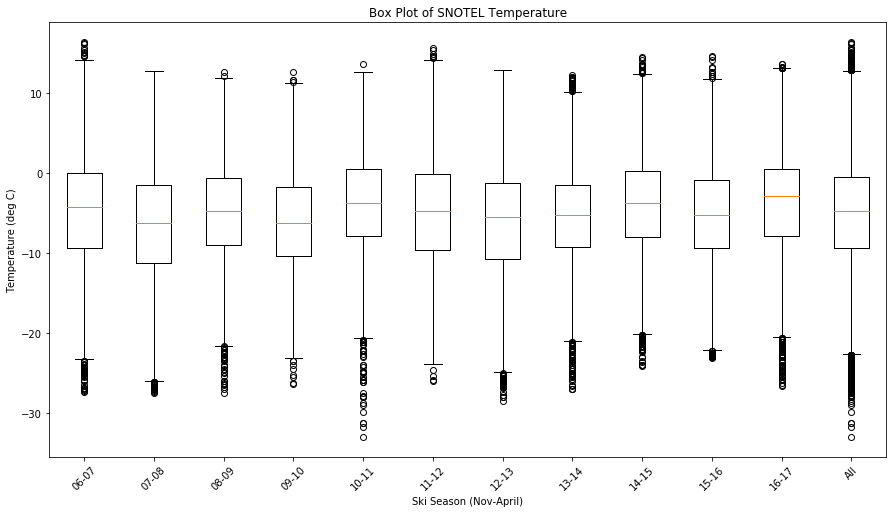

In [8]:

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_df['TOBS.I-1 (degC) '][~np.isnan(snotel_df['TOBS.I-1 (degC) '])]

merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Temperature')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Temperature (deg C)')

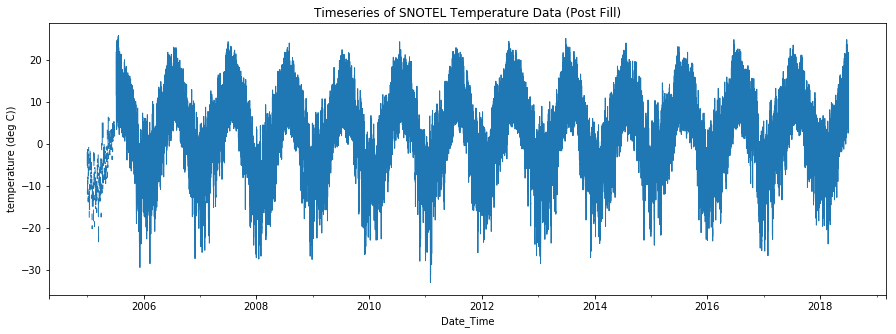

In [9]:
#years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

#for j in years:
plt.figure(figsize=(15,5))
    
ax1 = snotel_filled_df['TOBS.I-1 (degC) '].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("temperature (deg C))")
ax1.set_title("Timeseries of SNOTEL Temperature Data (Post Fill)")
  
#ax2 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, secondary_y = True, marker='.', markersize = 0.25)
#ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
#Create legend
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

plt.show()

----

----


## Is there a correlation between snowfall and wind speed?

**First calculate 12-snowfall column by finding difference between 12-hr snow depth observations**

In [10]:

#Now calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
snotel_filled_df['12hr_SNWD'] = snotel_filled_df['SNWD.I-1 (in) '].resample('12H').last()
snotel_filled_df['12hr-SNOWFALL'] = snotel_filled_df['12hr_SNWD']-snotel_filled_df['12hr_SNWD'].shift(+12)




In [11]:
asos_filled_df = asos_df.interpolate(limit=3)
asos_snotel_df = pd.merge(snotel_filled_df, asos_filled_df, on='Date_Time', how='outer')
print(asos_snotel_df.keys())


Index(['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', '12hr_SNWD', '12hr-SNOWFALL',
       'Temperature_degC', 'Dewpoint_degC', 'Pressure_hp', 'WindDirection_deg',
       'WindSpeed_m/s', 'CloudCover', '1hr_Precipitation_mm',
       '6hr_Precipitation_mm'],
      dtype='object')


Date_Time
2005-07-08 12:00:00    3.0
2005-07-23 12:00:00    3.0
2005-07-29 12:00:00    3.0
2005-10-06 12:00:00    3.0
2005-10-07 12:00:00    3.0
Name: 12hr-SNOWFALL, dtype: float64
slope = 0.04726913728249773 )
intercept = 4.0609192755928305
0.04726913728249773 4.0609192755928305


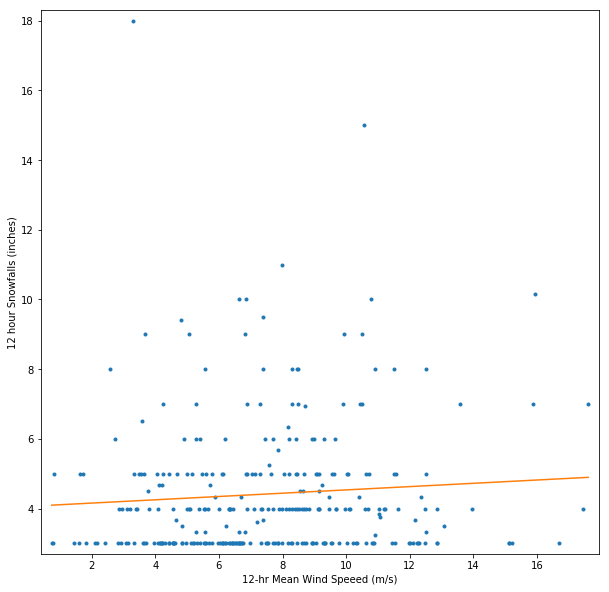

In [183]:
fig = plt.figure(figsize = (10,10))

yy = asos_snotel_df['12hr-SNOWFALL']>=3
snf_df = asos_snotel_df['12hr-SNOWFALL'][yy]

print(snf_df.head())

ws_df = asos_snotel_df['WindSpeed_m/s'].resample('12H').mean()

#print(ws_df, snf_df)

#snf_ws_df = pd.merge(sn, asos_filled_df, on='Date_Time', how='outer')

idx = np.isfinite(ws_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(ws_df[idx], snf_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('12 hour Snowfalls (inches)')
_ = plt.xlabel('12-hr Mean Wind Speeed (m/s)')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(ws_df[idx], snf_df[idx], 1)

# Print the results to the screen
print('slope =', a, ')')
print('intercept =', b)

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(ws_df[idx]),np.max(ws_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between snowfall and cloud cover?

slope = 0.09504280116134277
intercept = 3.793201419551192
0.09504280116134277 3.793201419551192


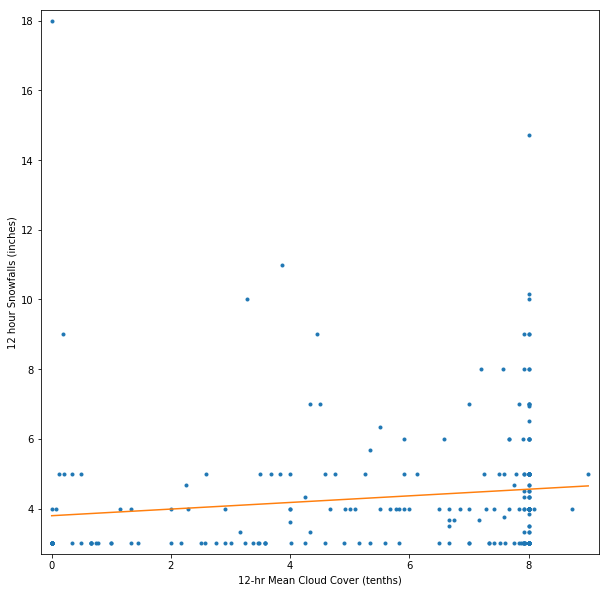

In [182]:
plt.figure(figsize=(10,10))


yy = asos_snotel_df['12hr-SNOWFALL']>=3
snf_df = asos_snotel_df['12hr-SNOWFALL'][yy]

cc_df = asos_snotel_df['CloudCover'].resample('12H').mean()



idx = np.isfinite(cc_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(cc_df[idx], snf_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('12 hour Snowfalls (inches)')
_ = plt.xlabel('12-hr Mean Cloud Cover (tenths)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(cc_df[idx],snf_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(cc_df[idx]),np.max(cc_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between snowfall and temperature?

slope = 0.0002913092174919709
intercept = 4.438301082775647


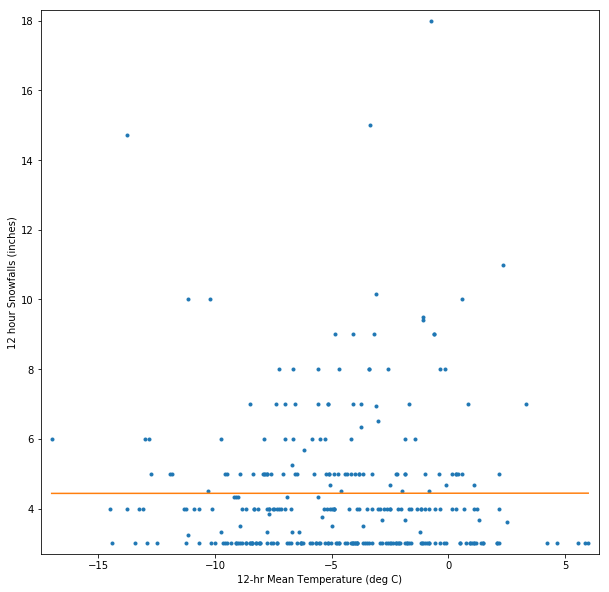

In [184]:
plt.figure(figsize=(10,10))



snf_df=asos_snotel_df['12hr-SNOWFALL']
snf_df[asos_snotel_df['12hr-SNOWFALL']<3] = np.NaN
temp_df = asos_snotel_df['Temperature_degC'].resample('12H').mean()



idx = np.isfinite(temp_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(temp_df[idx],snf_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('12 hour Snowfalls (inches)')
_ = plt.xlabel('12-hr Mean Temperature (deg C)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(temp_df[idx], snf_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)


# Make theoretical line to plot
x = np.array([np.min(temp_df[idx]),np.max(temp_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between ASOS temperatures and SNOTEL temperatures?

slope = 0.7946534080292871
intercept = 0.08114918067847689
0.7946534080292871 0.08114918067847689


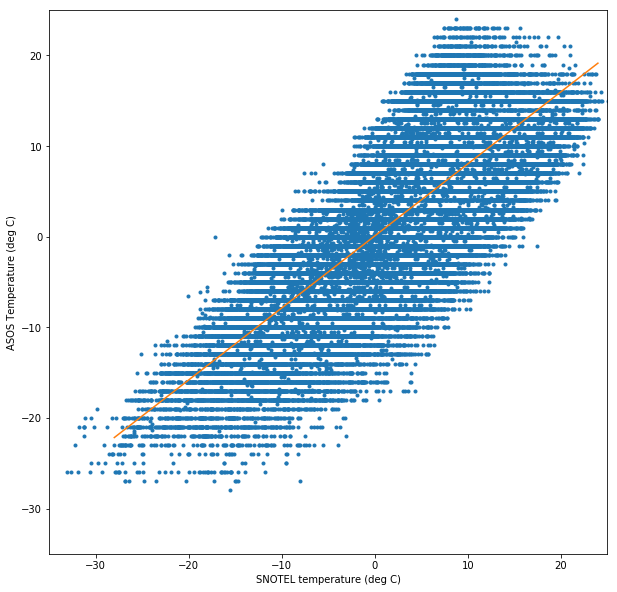

In [177]:
plt.figure(figsize=(10,10))

asos_temp_df=asos_snotel_df['Temperature_degC']
snotel_temp_df = asos_snotel_df['TOBS.I-1 (degC) ']



idx = np.isfinite(asos_temp_df) & np.isfinite(snotel_temp_df)

# Plot the snowfall vs temperature
_ = plt.plot(snotel_temp_df[idx], asos_temp_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('ASOS Temperature (deg C)')
_ = plt.xlabel('SNOTEL temperature (deg C)')
_ = plt.xlim([-35, 25])
_ = plt.ylim([-35, 25])


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snotel_temp_df[idx], asos_temp_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b) 

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(asos_temp_df[idx]),np.max(asos_temp_df[idx])])
y = a * x + b
_ = plt.plot(x, y)


## Seaborne joint plots

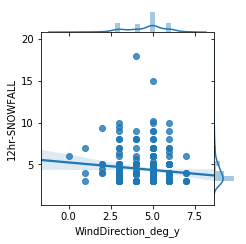

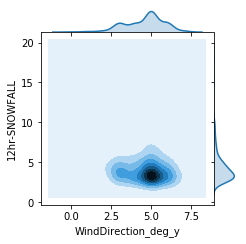

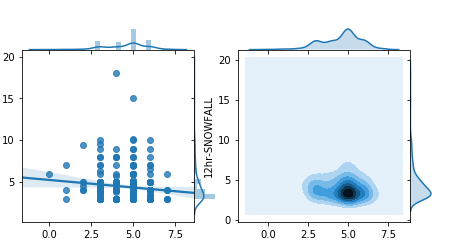

In [191]:
import seaborn as sns
snf_df=asos_snotel_df['12hr-SNOWFALL']


df = bin_wd_df.join(snf_df)

df = df.dropna()
JG1 = sns.jointplot('WindDirection_deg_y', '12hr-SNOWFALL', data=df, kind='reg')
JG2 = sns.jointplot('WindDirection_deg_y', '12hr-SNOWFALL', data=df, kind='kde')

#subplots migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

#subplots size adjustment
f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])

## Seaborne pairplot

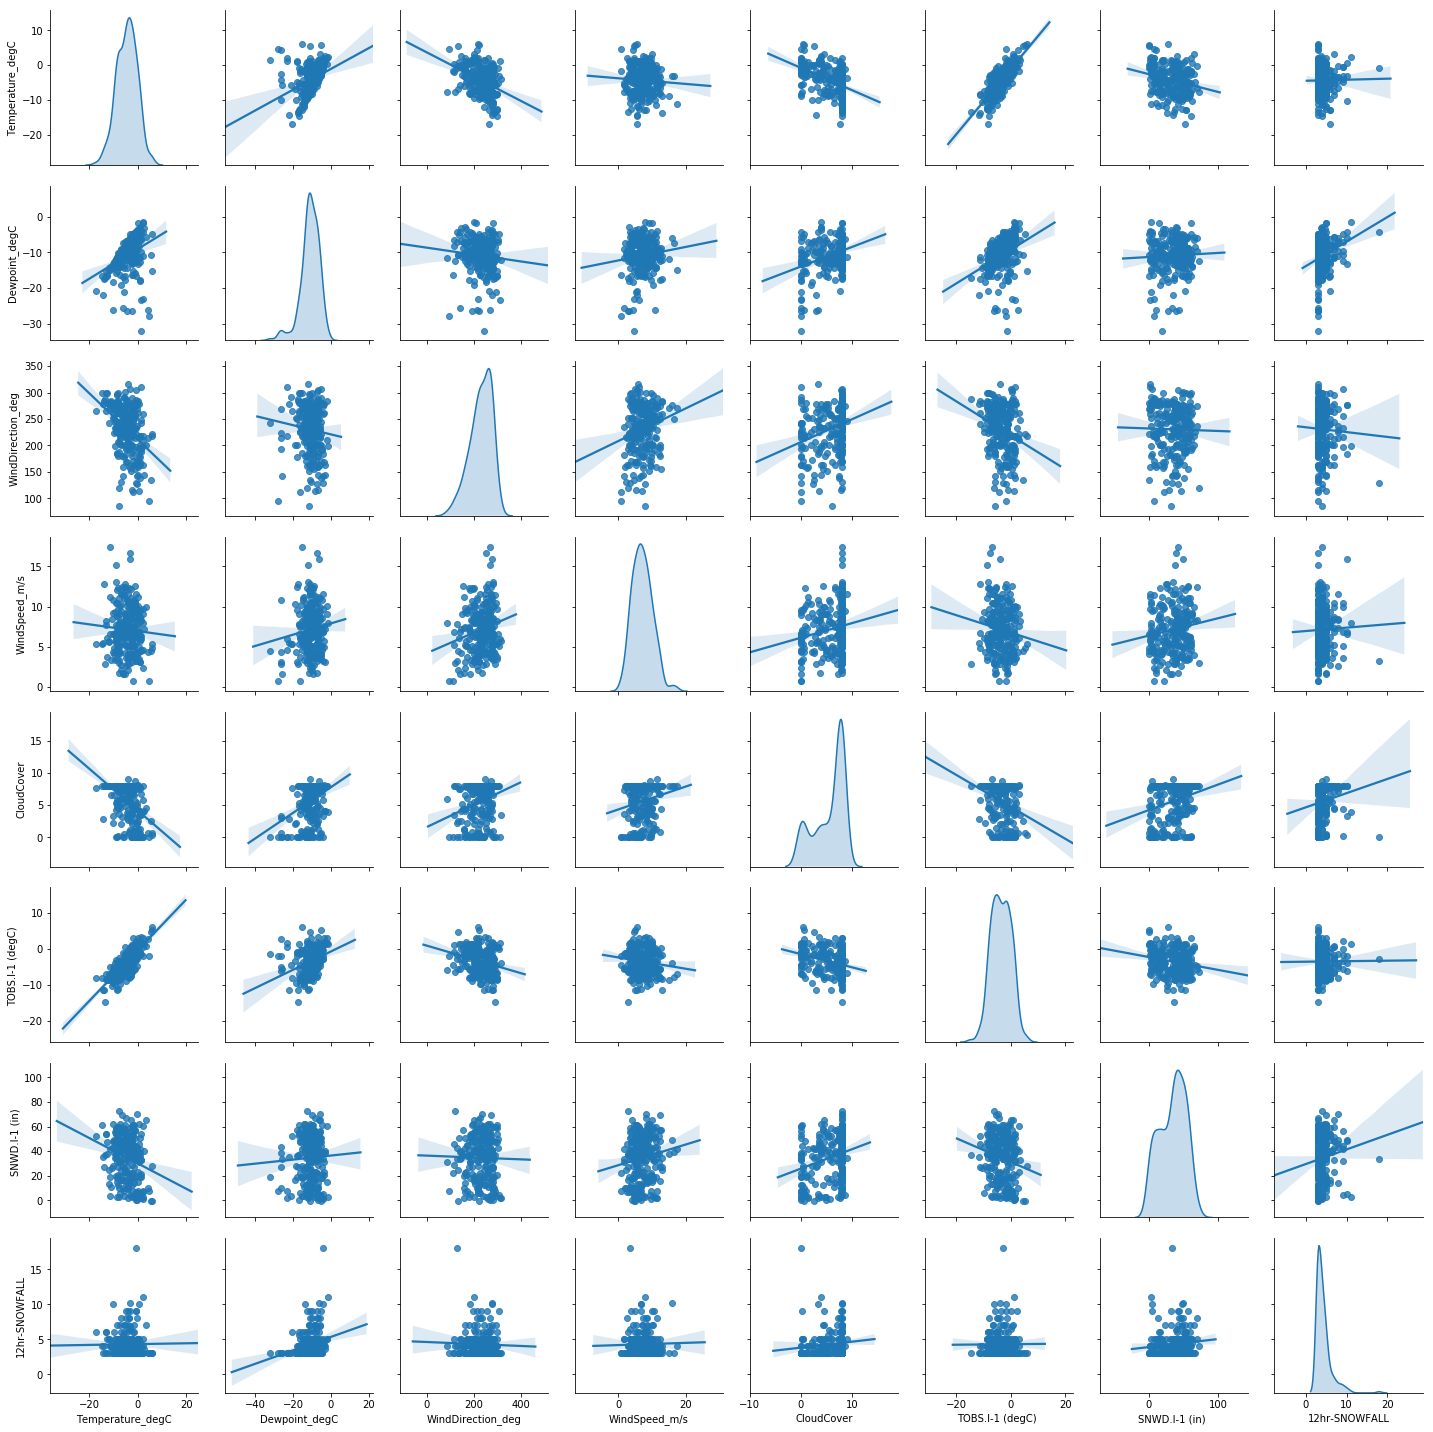

                     Temperature_degC  Dewpoint_degC  WindDirection_deg  \
Date_Time                                                                 
2006-01-04 12:00:00         -9.750000     -12.583333         267.500000   
2006-01-12 00:00:00         -6.750000     -13.250000         258.333333   
2006-01-15 12:00:00         -8.250000     -14.166667         206.666667   
2006-01-19 00:00:00         -8.916667     -12.000000         235.000000   
2006-01-29 00:00:00        -13.000000     -15.333333         298.333333   

                     WindSpeed_m/s  CloudCover  TOBS.I-1 (degC)   \
Date_Time                                                          
2006-01-04 12:00:00       4.891667    8.000000         -7.566667   
2006-01-12 00:00:00       8.108333    5.916667         -8.283333   
2006-01-15 12:00:00       4.966667    4.583333         -7.983333   
2006-01-19 00:00:00       5.591667    8.000000         -7.200000   
2006-01-29 00:00:00       8.191667    8.000000         -8.575000  

In [186]:
df2 = asos_snotel_df.resample('12H').mean().loc[:, ['Temperature_degC','Dewpoint_degC','WindDirection_deg', 'WindSpeed_m/s', 'CloudCover', 'TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', '12hr-SNOWFALL' ]].dropna()
sns.pairplot(df2, diag_kind = "kde", kind = "reg")
plt.show()
print(df2.head())

# Exploring Wind Statistics

## Is there a correlation between Wind Direction and Snowfall?

slope = -0.18050428200961252
intercept = 5.230128744223273
range(0, 8)


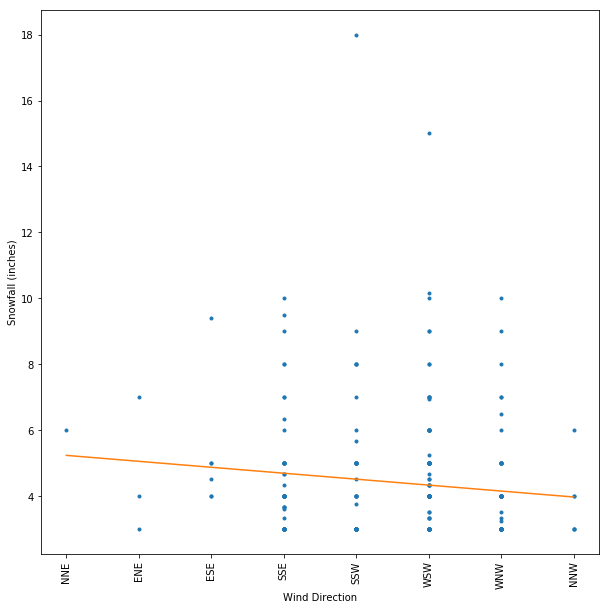

In [172]:

#Define variables
wd_df = asos_snotel_df['WindDirection_deg']
bin_wd_df = pd.DataFrame()
wd_df = asos_snotel_df['WindDirection_deg']

#Define function for binning
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=False)
  return colBin




#Create bins for cut points.  Will return 0 for anything less then first number

#cut_points = [int(i) for i in np.linspace(45, 315, 7)]  #[45, 90, 135, 180, 225, 270, 315]
#cut_points = [int(i) for i in np.linspace(45, 360, 8)]  #np.linspace(0, 360, 9)
cut_points = [45, 90, 135, 180, 225, 270, 315]


labels = ['NNE', 'ENE', 'ESE', 'SSE', 'SSW', 'WSW', 'WNW', 'NNW'] 



#Put categorical data from function output in a varable bin_wd_df
bin_wd_df = pd.DataFrame(binning(asos_snotel_df['WindDirection_deg'].dropna(), cut_points))

#Append to wd_df
bin_wd_df=wd_df.to_frame().merge(bin_wd_df, right_index=True, left_index=True,how='outer')

#Change the categorical data to actual numeric data
bin_wd_df['WindDirection_deg_y']=  pd.to_numeric(bin_wd_df['WindDirection_deg_y'], errors='coerce')

#Only keep non NaN values                         
idx = np.isfinite(bin_wd_df['WindDirection_deg_y']) & np.isfinite(snf_df)

                         
#Create best fit line
a, b = np.polyfit(bin_wd_df['WindDirection_deg_y'][idx], snf_df[idx], 1)
print('slope =', a)
print('intercept =', b)



plt.figure(figsize=(10,10))

# Plot the Wind Direction vs snowfall by bin
_ = plt.plot(bin_wd_df['WindDirection_deg_y'][idx], snf_df[idx], marker='.', linestyle='none')

# Make theoretical line to plot
x = range(0,8)
y = a * x + b
_ = plt.plot(x, y)



_=plt.xticks(x, labels, rotation='vertical')
_=plt.xlabel("Wind Direction")
_=plt.ylabel('Snowfall (inches)')
print(x)
#plt.show()




In [ ]:
def showRoseWind(values, city_name, max_value):
    N = 8
    theta = np.arange( 0., 2 * np.pi, 2 * np.pi / N)
    radii = np.array(values)
    print(radii)
    plt.axes([ 0.025, 0.025, 0.95, 0.95], polar = True)
    colors = [( 1-x/max_value, 1-x/max_value, 0.75) for x in radii]
    plt.bar( theta, radii, width =( 2* np.pi/ N), bottom = 0.0, color = colors)
    #plt.bar( theta, snf_df)
    plt.title( city_name, x = 0.2, fontsize = 20)

#Nelli, Fabio. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language (Kindle Locations 6381-6386). Apress. Kindle Edition. 

In [ ]:
#hist, bin = np.histogram(asos_snotel_df['WindDirection_deg'], 8,[ 0,360]) 
hist, bin = np.histogram(snf_df, 8,[ 0,24]) 
print(hist)
print(hist)
showRoseWind(hist, 'Copper Mtn Wind Direction Counts', 200000)

#Nelli, Fabio. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language (Kindle Locations 6399-6401). Apress. Kindle Edition. 

## Wind Rose with windrose

11-2007
range(0, 12)


c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


<Figure size 360x576 with 0 Axes>

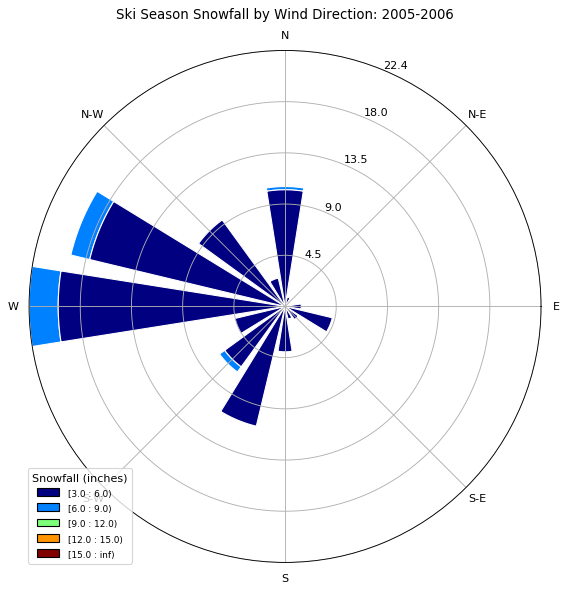

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


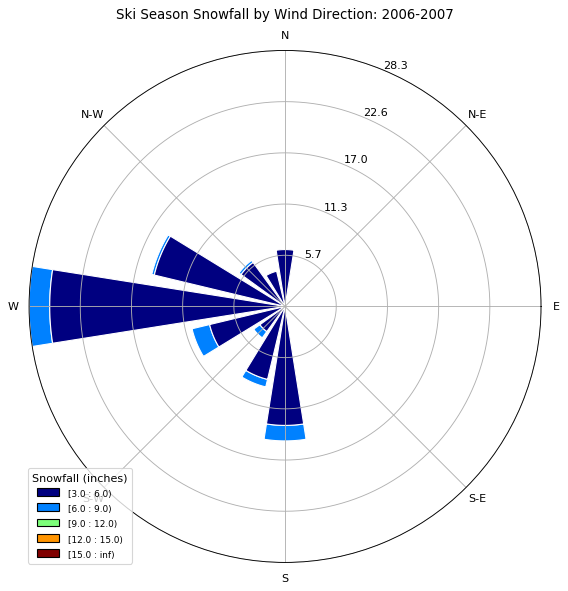

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


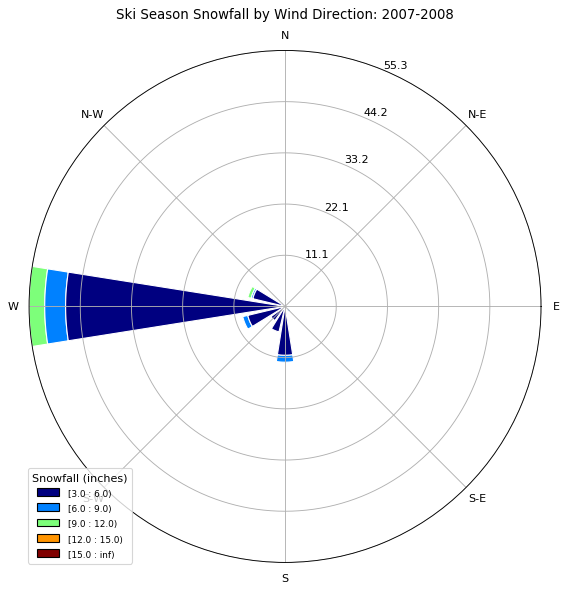

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


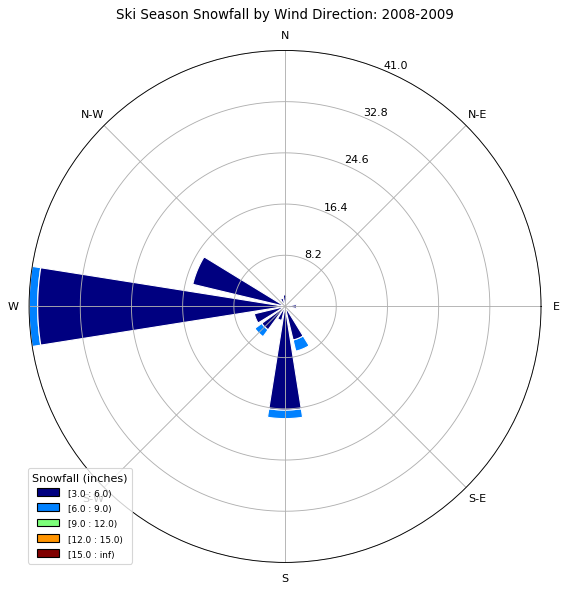

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


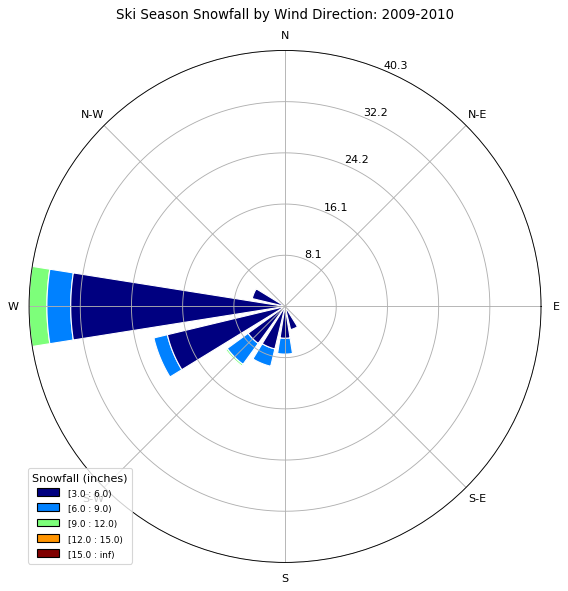

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


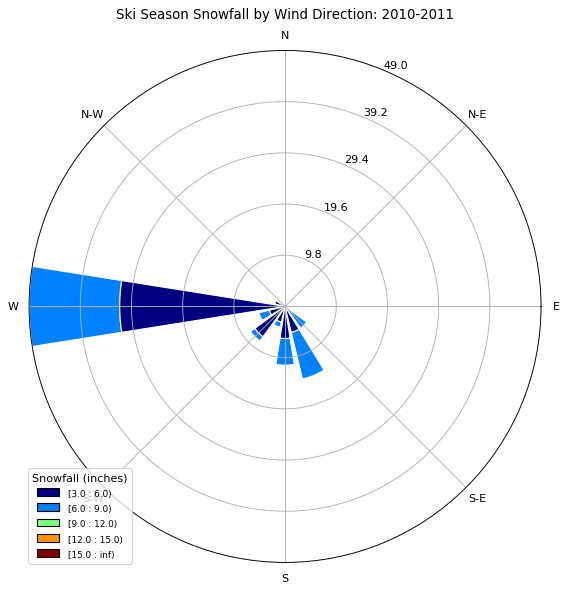

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


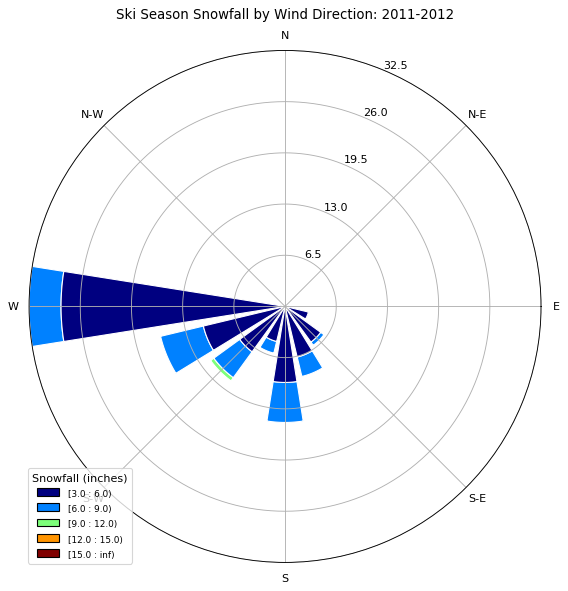

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


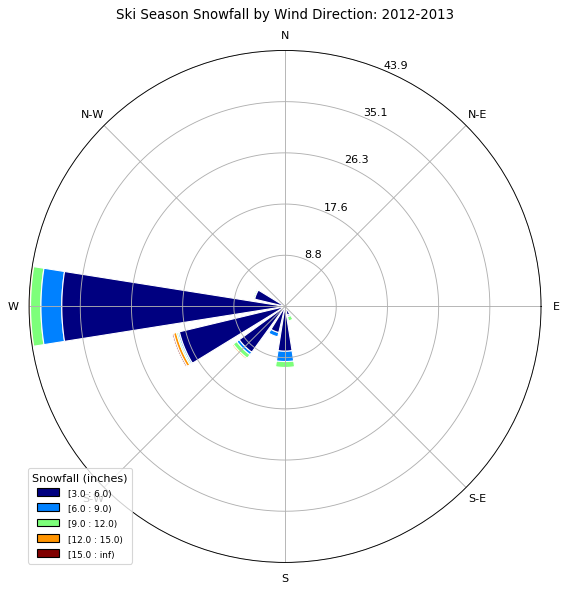

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


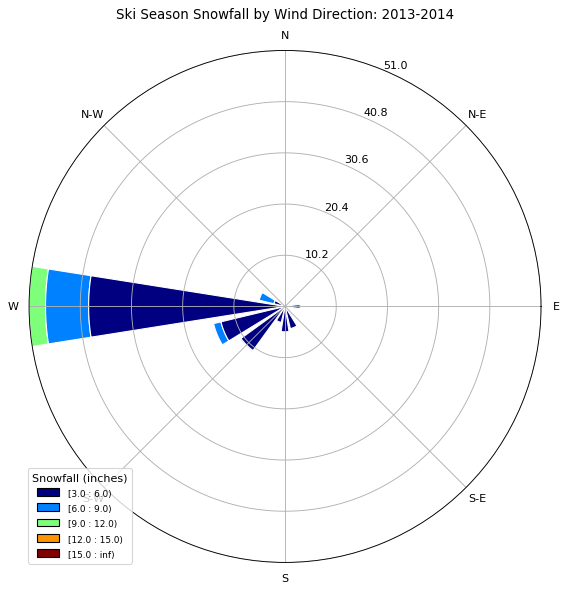

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


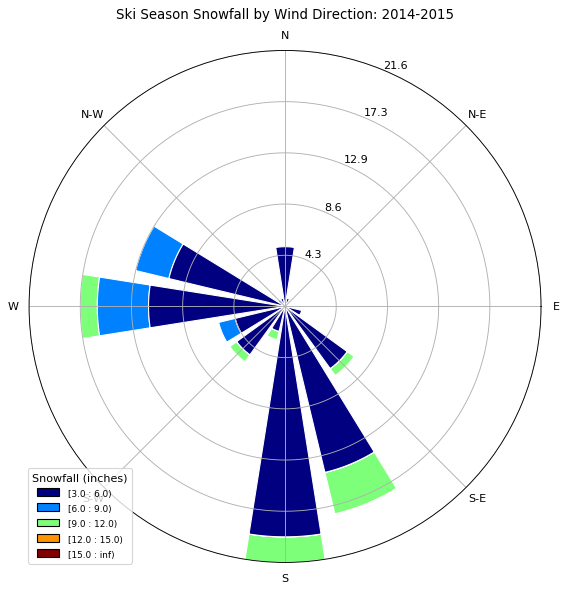

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


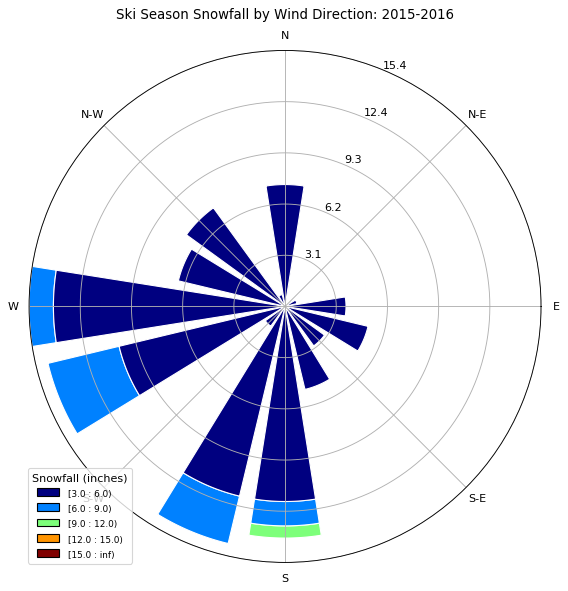

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()


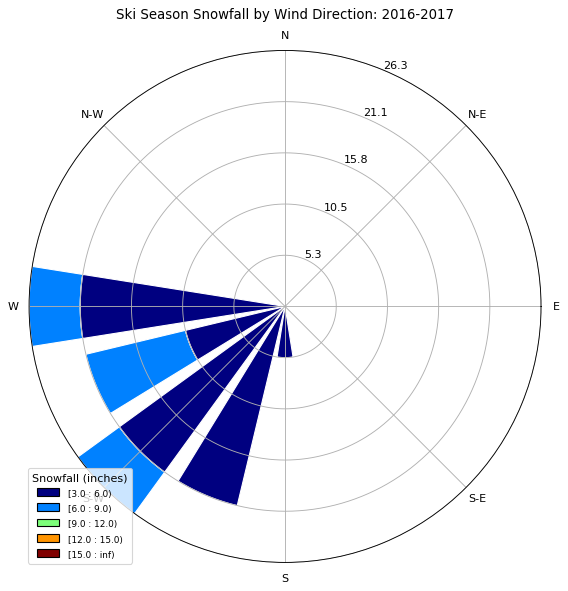

In [208]:
import windrose as wr

yy = asos_snotel_df['12hr-SNOWFALL']<3
snf_df[yy] = 0

fig = plt.figure(figsize=(5,8))
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
x = '2006'

print('11-' +str(int(years[0])+1))

print(range(len(years)))

for k in range(len(years)):
    #print(str(int(years[k])+1))
    #plt.subplot(4, 3, k+1)
    
    wd_df1 = asos_snotel_df['WindDirection_deg'][(asos_snotel_df['WindDirection_deg'].index.month >= 11) & \
                                                (asos_snotel_df['WindDirection_deg'].index.year == int(years[k]))]  #.resample('12H').mid()
    wd_df2 = asos_snotel_df['WindDirection_deg'][(asos_snotel_df['WindDirection_deg'].index.month <= 4) & \
                                                (asos_snotel_df['WindDirection_deg'].index.year == int(years[k])+1)]  #.resample('12H').mid()
    
    
    snf_rs1 = snf_df[(snf_df.index.month >= 11) & (snf_df.index.year == int(years[k]))].resample('1H').interpolate(limit=12).resample('H', how = 'min')
    snf_rs2 = snf_df[(snf_df.index.month <= 4) & (snf_df.index.year == int(years[k])+1)].resample('1H').interpolate(limit=12).resample('H', how = 'min')
    #snf_rs =snf_rs1.to_frame().join(snf_rs2.to_frame(), right_index=True, left_index=True,how='outer').resample('1H').interpolate(limit=12).resample('H', how = 'min')
    snf_rs = pd.concat([snf_rs1, snf_rs2])
    
    #print(snf_rs1.head())
    
    #wd_df = wd_df1.to_frame().join(wd_df2.to_frame(), right_index=True, left_index=True,how='outer')
    wd_df = pd.concat([wd_df1, wd_df2])
    
    df = wd_df.to_frame().merge(snf_rs.to_frame(), right_index=True, left_index=True,how='outer').dropna()
    #print(df.describe())
    #print(df.head())
    

      #idx = np.isfinite(wd_df) & np.isfinite(snf_rs)
    
    #ax.bar(asos_snotel_df['WindDirection_deg']["'%s'":%s'" % (strt, end)][idx], snf_df["'%s:%s'" % (strt, end)][idx], normed=True, opening=0.8, edgecolor='white')
    ax = wr.WindroseAxes.from_ax()
    plt.figsize = (5,8)
    ax.bar(df['WindDirection_deg'], df['12hr-SNOWFALL'], normed=True, bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
    #ax.contour(df['WindDirection_deg'], df['12hr-SNOWFALL'], bins=np.arange(3, 18, 5), normed=True, lw=3)
   #plt.ylabel("% of occurence")
    plt.title("Ski Season Snowfall by Wind Direction: "+ str(int(years[k])-1) + "-"+ years[k])

    
    ax.set_legend(title = 'Snowfall (inches)')
    plt.show()


In [ ]:
import cmath as cmath
import math

In [ ]:
def r_wind_new(n_rwd, rrdd, rwnd):
    wind_vector_sum = None
 
    if n_rwd > 2:
        for i in range(0, n_rwd):
            wind_polar = cmath.rect(rwnd[i], rrdd[i] - math.pi)
            if wind_vector_sum is None:
                wind_vector_sum = wind_polar
            else:
                wind_vector_sum += wind_polar
 
        r, phi = cmath.polar(wind_vector_sum / n_rwd)
 
        rwdir = int(round(int(round(math.degrees(phi) % 360)) / 10.0))
        rwspd = int(round(r*10))/10.0
    else:
        return None, None
 
    return '%2i' % rwdir, '%#5.1f' % rwspd

In [ ]:
print(r_wind_new(len(asos_snotel_df['WindDirection_deg']), [math.radians(asos_snotel_df['WindDirection_deg']+180)], asos_snotel_df['WindSpeed_m/s']))

In [ ]:
month = asos_snotel_df[asos_snotel_df.index.month==2]
print(month)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx = np.isfinite(asos_snotel_df['WindDirection_deg']['11-2008':'04-2009']) & np.isfinite(snf_df['11-2008':'04-2009'])


theta = np.radians(asos_snotel_df['WindDirection_deg']['11-2008':'04-2009'][idx])  #np.linspace(0,2*np.pi)
r = np.linspace(2,18,9)
print(r)


Theta, R = np.meshgrid(theta, r)
print(R)
print(np.degrees(Theta))
C = snf_df['11-2008':'04-2009'][idx] #np.sinc(Theta-2)+(5-np.sqrt(R))+np.random.rand(len(r),len(theta))
#C = np.ma.masked_less_equal(C,2)

fig, ax = plt.subplots(subplot_kw={"projection":"polar"})

ax.pcolormesh(Theta, R, C, vmin=2, vmax=5)

#asos_snotel_df['WindDirection_deg']['11-2008':'04-2009'], snf_df['11-2008':'04-2009']
plt.show()